In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV,learning_curve


In [131]:
X_train = pd.read_csv('csv/X_train.csv')
X_test = pd.read_csv('csv/X_test.csv')
y_train = pd.read_csv('csv/y_train.csv')
y_test = pd.read_csv('csv/y_test.csv') 

# Algorithme de régression linéaire Ridge

### Recherche du meilleur alpha

In [132]:

# modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': [0,0.01,0.05,0.1,1,10,100,300,400,500,1000,10000]},
#                                  scoring='r2',
#                                  refit=True))

# for exp in range(2):
#     affinage = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
#     liste_param = [param for param in np.arange(affinage - (affinage/10**(exp+1)),affinage + (affinage/10**(exp+1)), 10**(-exp))]
#     modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': liste_param},
#                                  scoring='r2',
#                                  refit=True))

# best_alpha = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
# best_alpha


In [133]:
best_alpha=1109.90999999998

# Utilisation du model Ridge

In [134]:
modelRid = make_pipeline( PolynomialFeatures(degree=2),Ridge(alpha=best_alpha))

## Courbe d'apprentissage

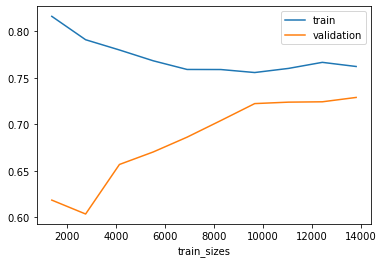

In [135]:

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X_train,y_train,train_sizes=np.linspace(0.1, 1, 10), cv=5,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

## Prédiction

In [136]:
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.7604421854481236

In [137]:
modelRid.score(X_test,y_test)

0.7550741828118339

In [138]:
y_prediction = modelRid.predict(X_test)
df_prediction = pd.DataFrame(y_prediction,columns=["prediction"])

In [139]:
df_prediction["resultat"] = y_test['price']

In [140]:
df_prediction["diff"]= ((df_prediction["resultat"] - df_prediction["prediction"])**2)**(1/2)

In [141]:
df_prediction.describe()

,prediction,resultat,diff
count,4.320000e+03,4.320000e+03,4.320000e+03
mean,5.389669e+05,5.416757e+05,1.279219e+05
std,3.173211e+05,3.639041e+05,1.267549e+05
min,8.347118e+04,8.400000e+04,3.579502e+01
25%,3.602067e+05,3.250000e+05,4.999658e+04
50%,4.455739e+05,4.550000e+05,9.889576e+04
75%,6.095053e+05,6.513250e+05,1.618363e+05
max,6.212519e+06,7.700000e+06,1.487481e+06


In [142]:
df_prediction

,prediction,resultat,diff
0,3.688672e+05,338900.0,29967.174306
1,4.362454e+05,543000.0,106754.645173
2,4.411790e+05,565000.0,123821.043477
3,1.099474e+06,880000.0,219473.521872
4,6.113648e+05,562000.0,49364.775793
...,...,...,...
4315,4.852960e+05,677900.0,192603.980864
4316,3.516158e+05,192950.0,158665.835381
4317,4.276354e+05,330000.0,97635.404842
4318,3.752362e+05,379900.0,4663.802787


In [143]:
# modelLasso = make_pipeline( PolynomialFeatures(2),GridSearchCV(Lasso(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelLasso.fit(X_train,y_train)

In [144]:
# modelLasso.score(X_test,y_test)

In [145]:
# prediction = modelLasso.predict(X_test)
# prediction

In [146]:
# modelEN = make_pipeline( PolynomialFeatures(2),GridSearchCV(ElasticNet(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelEN.fit(X_train,y_train)
# print("")

In [147]:
# modelEN.score(X_test,y_test)

In [148]:
# prediction = modelEN.predict(X_test)
# prediction

# LinearRegression

In [149]:
modelLR = make_pipeline( PolynomialFeatures(2),LinearRegression())
modelLR.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [150]:
modelLR.score(X_test,y_test)

0.7407435445174985

In [151]:
y_lr_prediction = modelLR.predict(X_test)
y_lr_prediction

array([[343590.65625],
       [442835.59375],
       [428424.625  ],
       ...,
       [362773.84375],
       [390959.15625],
       [362072.     ]])

# Methode naif

In [152]:
modelDummy = DummyRegressor()
modelDummy.fit(X_train,y_train)
modelDummy.score(X_test,y_test)

-2.5762973467680084e-05

In [153]:
prediction = modelDummy.predict(X_test)
prediction

array([539828.85766381, 539828.85766381, 539828.85766381, ...,
       539828.85766381, 539828.85766381, 539828.85766381])